# Poincare Maps projection on Thioredoxins0.9

In [127]:
import os
import pandas as pd
#import plotly
import plotly.express as px
from pplots_new import read_embeddings, plot_embedding, plot_embedding_interactive, rotate, get_colors
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [98]:
# class species from thioredoxin annotation file into different kingdom 
bacteria_specie = ["Bacteria", "LBCA", "LGPCA",  "LPBCA", "Salmonella", "Shigella", "Escherichia", "Acidobacteria", "Deinococcus", "Thermus", 
                    "Solibacter", "Helicobacter", "Geobacter", "Wolinella", "Neisseria", "Bordetella", "Brucella", "Rickettsia", "Campylobacter",
                   "Thiobacillus", "Burkholderia", "Vibrio",  "Desulfovibrio", "Bdellovibrio", "Yersinia", "Agrobacterium", "Actinobacteria", "Thermobifida",
                   "Flavobacterium","Geobacterium", "Chloroflexus", "Aquifex", "Enterococcus","Chlamydia", "Chlamydophila", "Listeria", "Lactobacillus",
                   "Geobacillus",  "Chlorobium",  "Rhodopirrelula", "Clostridium", "Hyperthermus", "Porphyromonas", "Streptomyces", 
                   "Syneschocystis", "Nostoc", "Thermosynechococus", "Prochlorococcus", "Nostoc1", "Sinorhizobium", "Pseudomonas", "Bacteroides", "Staphylococcus", 
                   "Thermoanaerobacter","Bacillus", "Mycobacterium", "Streptococcus", "Dehalococcoides", "Synechocystis", "Corynebacterium", "Thermosynechococcus",
                   "Rhodopirellula"]
archae_specie = ["Archaea", "LACA", "Aeropyrum","Thermofilum","Caldivirga","Sulfolobus","Haloquadratum","Haloarcula", "Thermoplasma", "Hyperthermus",
                 "Natronomonas","Methanocorpusculum", "Methanococcus", "Halobacterium", "Picrophilus","Methanospirillum","Staphylothermus",
                  "Methanosaeta", "Metallosphaera","Methanococcoides", "Candidatus","Archaeoglobus"]

eukaryota_animal= ["Eukaryota", "LECA", "LAFCA", "Ovis","Bos", "Mus","Rattus","Rabit", "Human", "Ponab","Macmu","Ornithorhynchus","Gallus","Equus",
                    "Theileria","Danio","Tetraodon","Xenopus","Ictalurus","Ophiophagus","Callithrix","Monodelphis","Geocy","Sus","Melopsittacus", # animal
                    "Monosiga", # choanoflagellata
                    "Graphocephala", "Tribolium", "Apis", "Bombyx","Litopenaeus","Drosophila", # insecta
                    "Entamoeba", "Plasmodium","Cryptosporidium", "Dictyostelium"  # unicellular parasite
                  ]
                                       
eukaryota_viridiplantae = ["Helicosporidium", "Ostreococcus", "Fagopyrum"]
eukaryota_mitochondrion = ["Bovin Mitochondrio", "Homo Mitochondrion",  "Rattus Mitochondrio", "Mus Mitochondrion"] 
eukaryota_chloroplast = ["Brana Chloroplast", "Pisum Chloroplast",  "Wheat Chloroplast", "Pea Chloroplast", "Spiol Chloroplast", "Arabidopsis"] 
eukaryota_fungi = ["Pichia", "Candida", "Aspergillus", "Kluyveromyces", "Saccharomyces","Schizosaccharomyces","Neosartorya"] 


# construction of palette 
trx_palette = {"OTHERS" : "#c7c7c7", "EUKARYOTA" : "#31955d", "CHLOROPLAST" : "#06f9d4", "MITOCHONDRION" : "#3ff100" , "root": "#000000", "AECA" : "#e7e53c",
               "Zea": "#c7c7c7", "Vitis":"#c7c7c7", "Limonium": "#c7c7c7"} 
trx_palette.update(dict.fromkeys(eukaryota_animal,"#21e548"))
trx_palette.update(dict.fromkeys(eukaryota_viridiplantae,"#b5e521"))
trx_palette.update(dict.fromkeys(eukaryota_mitochondrion, "#61ff06"))
trx_palette.update(dict.fromkeys(eukaryota_chloroplast,"#06f9d4"))
trx_palette.update(dict.fromkeys(eukaryota_fungi,"#1fb995"))
trx_palette.update(dict.fromkeys(bacteria_specie,"#34b8e7"))
trx_palette.update(dict.fromkeys(archae_specie, "#ff0000"))


In [136]:
# read the thioredoxin annotation file 
trx_df = pd.read_csv("./data/annotation_new.csv", index_col = 0)
print(trx_df)

         Species   Kingdom          Family Color_eukaryota
0           LBCA      LBCA            LBCA          OTHERS
1           LACA      LACA            LACA          OTHERS
2           AECA      AECA            AECA          OTHERS
3          LGPCA     LGPCA           LGPCA          OTHERS
4           LECA      LECA            LECA          OTHERS
..           ...       ...             ...             ...
205  Escherichia  Bacteria  Proteobacteria          OTHERS
206     Shigella  Bacteria  Proteobacteria          OTHERS
207   Salmonella  Bacteria  Proteobacteria          OTHERS
208     Yersinia  Bacteria  Proteobacteria          OTHERS
209       Vibrio  Bacteria  Proteobacteria          OTHERS

[210 rows x 4 columns]


# Thioredoxins0.9 - by Family

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [128]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1           -0.172963  0.095931           0         LBCA      LBCA   
2           -0.116782 -0.151616           1         LACA      LACA   
3           -0.055288 -0.119555           2         AECA      AECA   
4           -0.226944  0.442964           3        LGPCA     LGPCA   
5            0.640479 -0.121158           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206         -0.724132  0.533609         205  Escherichia  Bacteria   
207         -0.733357  0.530998         206     Shigella  Bacteria   
208         -0.718933  0.524274         207   Salmonella  Bacteria   
209         -0.726264  0.542592         208     Yersinia  Bacteria   
210         -0.704755  0.545130         209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                       

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


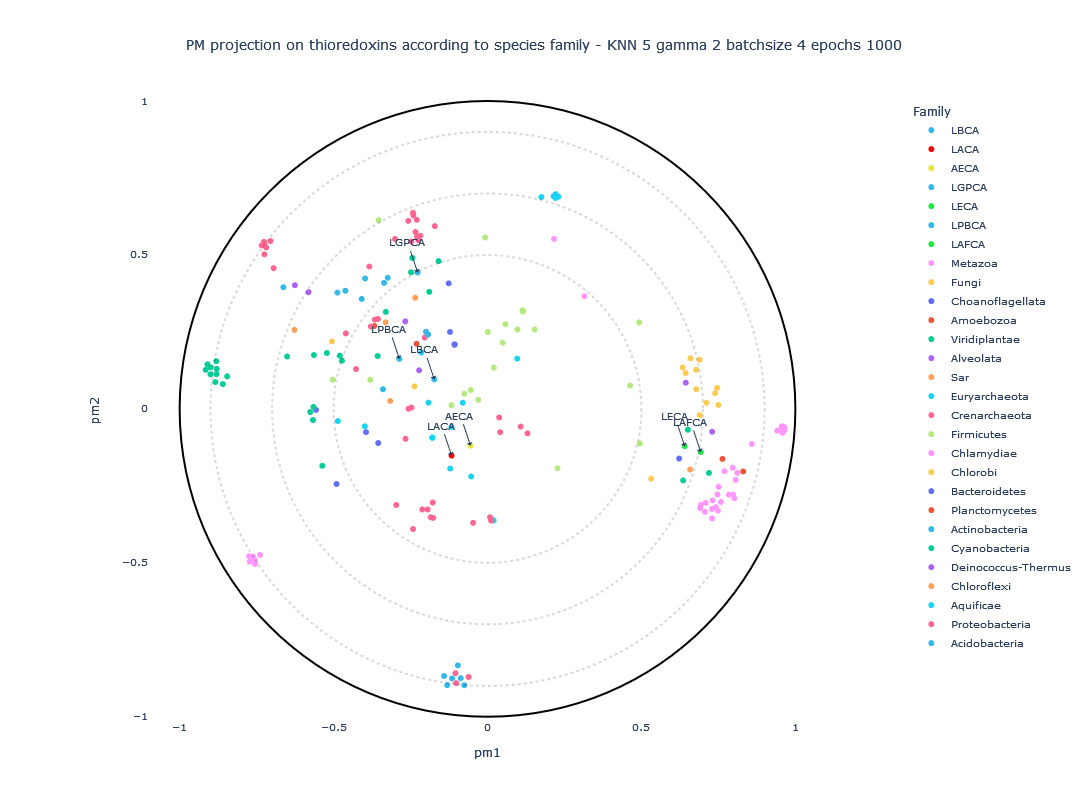

In [129]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Family',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to species family - KNN 5 gamma 2 batchsize 4 epochs 1000",
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate) 

In [132]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

result:                    pm1       pm2 Unnamed: 0      Species   Kingdom  \
proteins_id                                                         
0            0.000000  0.000000       root         root      root   
1           -0.014095 -0.177599          0         LBCA      LBCA   
2            0.162667  0.007940          1         LACA      LACA   
3            0.099358  0.042898          2         AECA      AECA   
4           -0.310070 -0.380119          3        LGPCA     LGPCA   
...               ...       ...        ...          ...       ...   
206         -0.209639 -0.878274        205  Escherichia  Bacteria   
207         -0.215461 -0.869909        206     Shigella  Bacteria   
208         -0.208035 -0.861562        207   Salmonella  Bacteria   
209         -0.223670 -0.875339        208     Yersinia  Bacteria   
210         -0.233787 -0.855481        209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                                  
0

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


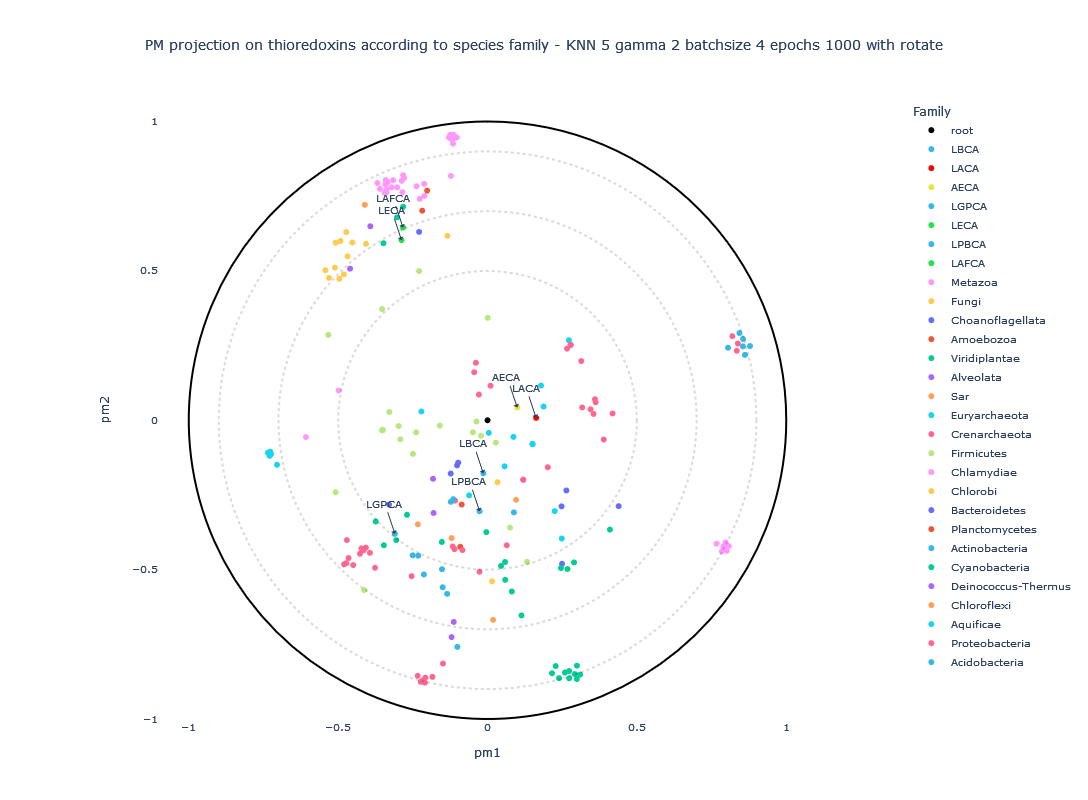

In [133]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Family',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'], 
                                    title = "PM projection on thioredoxins according to species family - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate",
                                    fontsize = 10

                              )
trace1.show()

# Thioredoxins0.9 - by Eukaryota

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [101]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1           -0.172963  0.095931           0         LBCA      LBCA   
2           -0.116782 -0.151616           1         LACA      LACA   
3           -0.055288 -0.119555           2         AECA      AECA   
4           -0.226944  0.442964           3        LGPCA     LGPCA   
5            0.640479 -0.121158           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206         -0.724132  0.533609         205  Escherichia  Bacteria   
207         -0.733357  0.530998         206     Shigella  Bacteria   
208         -0.718933  0.524274         207   Salmonella  Bacteria   
209         -0.726264  0.542592         208     Yersinia  Bacteria   
210         -0.704755  0.545130         209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                       

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


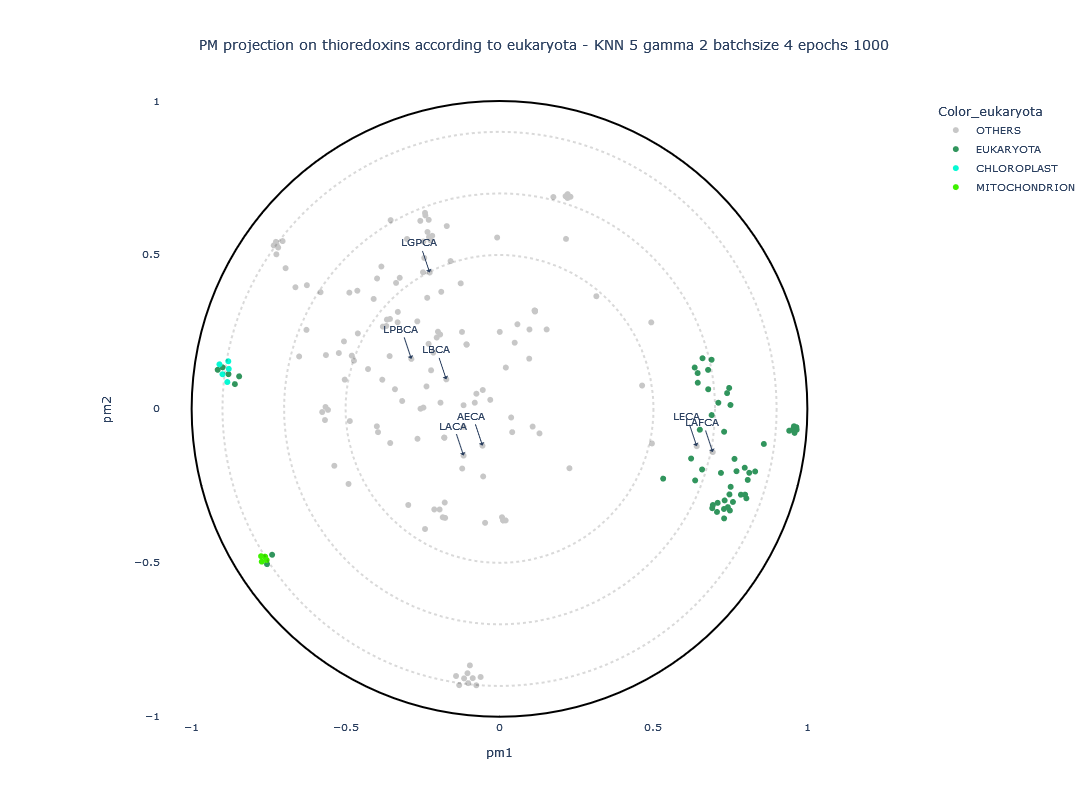

In [102]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Color_eukaryota',
                                    show_text=True,
                                    color_palette = trx_palette, 
                                    second_labels_name = "Kingdom",
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to eukaryota - KNN 5 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate) 

In [103]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

result:                    pm1       pm2 Unnamed: 0      Species   Kingdom  \
proteins_id                                                         
0            0.000000  0.000000       root         root      root   
1           -0.014095 -0.177599          0         LBCA      LBCA   
2            0.162667  0.007940          1         LACA      LACA   
3            0.099358  0.042898          2         AECA      AECA   
4           -0.310070 -0.380119          3        LGPCA     LGPCA   
...               ...       ...        ...          ...       ...   
206         -0.209639 -0.878274        205  Escherichia  Bacteria   
207         -0.215461 -0.869909        206     Shigella  Bacteria   
208         -0.208035 -0.861562        207   Salmonella  Bacteria   
209         -0.223670 -0.875339        208     Yersinia  Bacteria   
210         -0.233787 -0.855481        209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                                  
0

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


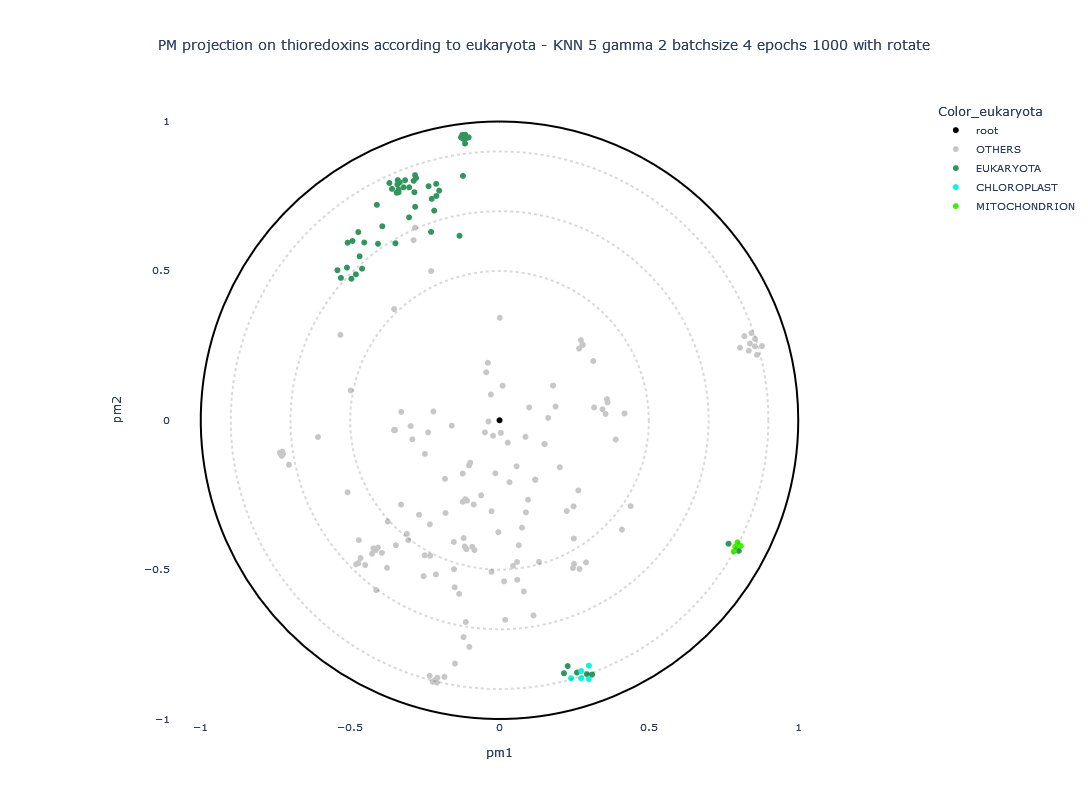

In [104]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Color_eukaryota',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to eukaryota - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate", 
                                    fontsize = 10
                              )
trace1.show()

# Thioredoxins0.9 - Kingdom

## KNN 3 gamma 2 (batchsize 4 epochs 1000)

In [105]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize4_epochs1000/PM3sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1           -0.206286 -0.066316           0         LBCA      LBCA   
2           -0.461005  0.260013           1         LACA      LACA   
3           -0.477490  0.087697           2         AECA      AECA   
4            0.262802 -0.605796           3        LGPCA     LGPCA   
5            0.427057  0.755525           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206         -0.259948 -0.935628         205  Escherichia  Bacteria   
207         -0.265066 -0.930456         206     Shigella  Bacteria   
208         -0.255494 -0.930337         207   Salmonella  Bacteria   
209         -0.267268 -0.938739         208     Yersinia  Bacteria   
210         -0.252003 -0.940281         209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                       

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


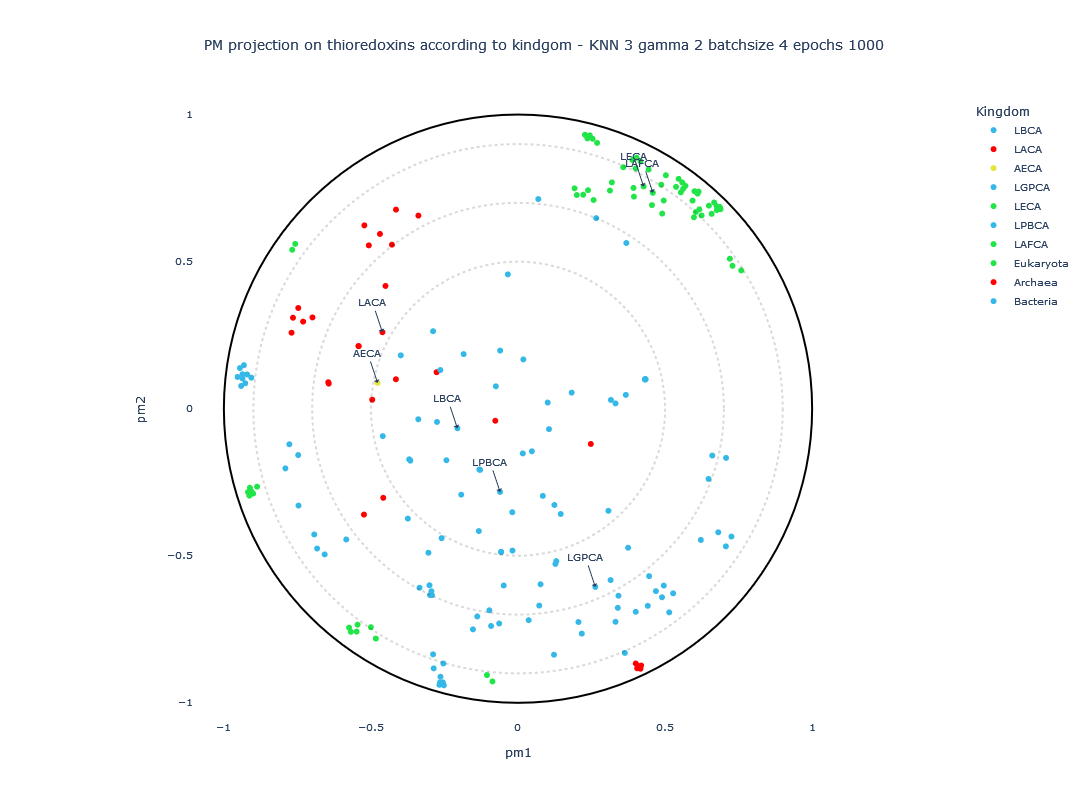

In [106]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'], 
                                    title = "PM projection on thioredoxins according to kindgom - KNN 3 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 3 gamma 2 (batchsize 4 epochs 1000 rotate)

In [108]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize4_epochs1000/PM3sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota',
       'Eukaryota_detail'],
      dtype='object')


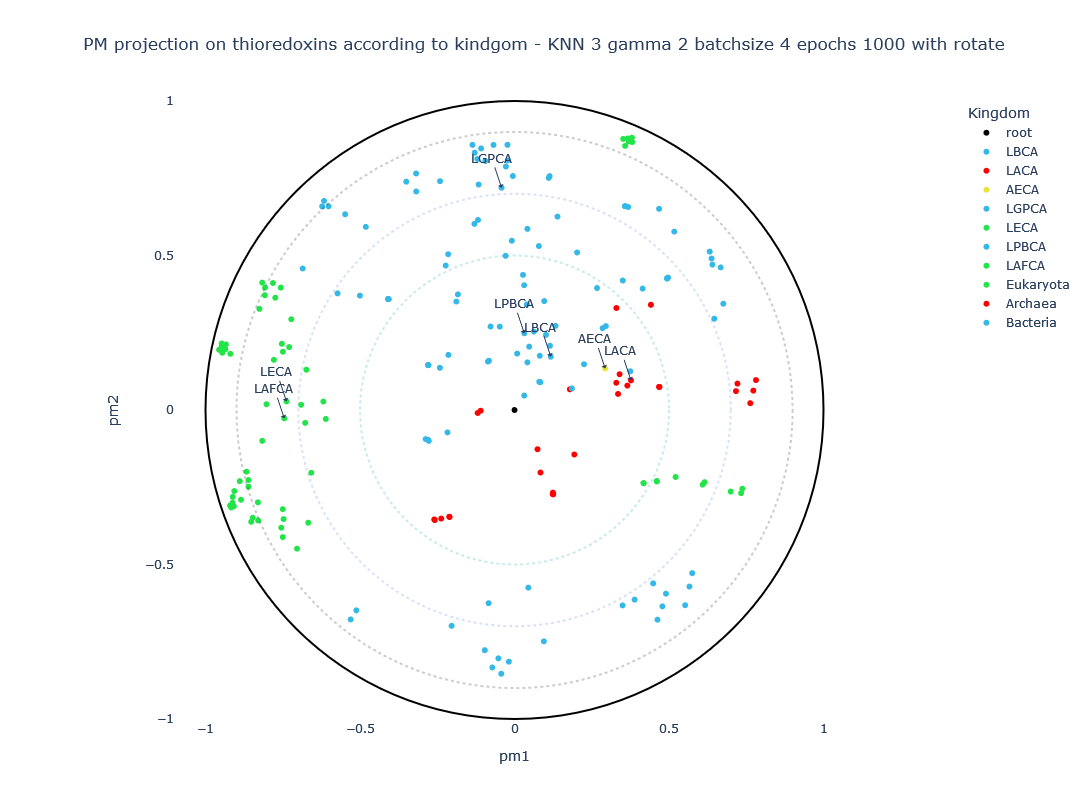

In [111]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette, 
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'], 
                                    title = "PM projection on thioredoxins according to kindgom - KNN 3 gamma 2 batchsize 4 epochs 1000 with rotate", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [168]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota',
       'Eukaryota_detail'],
      dtype='object')


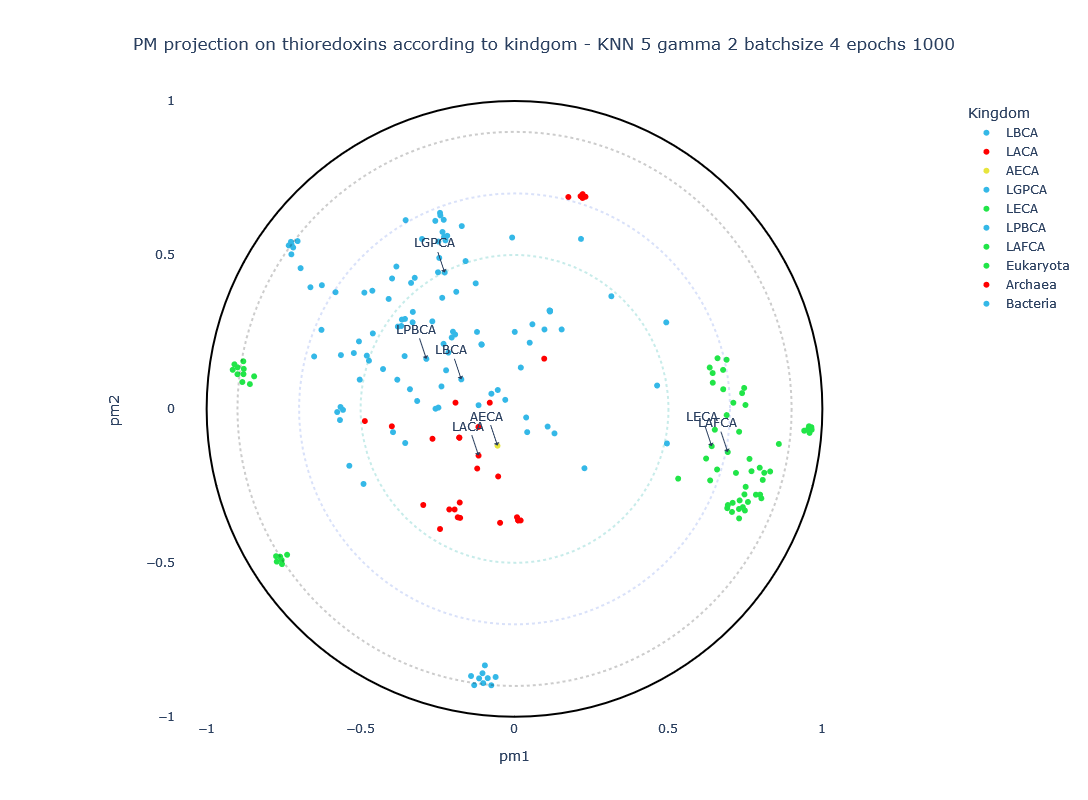

In [169]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to kindgom - KNN 5 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate) 

In [21]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True)

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota',
       'Eukaryota_detail'],
      dtype='object')


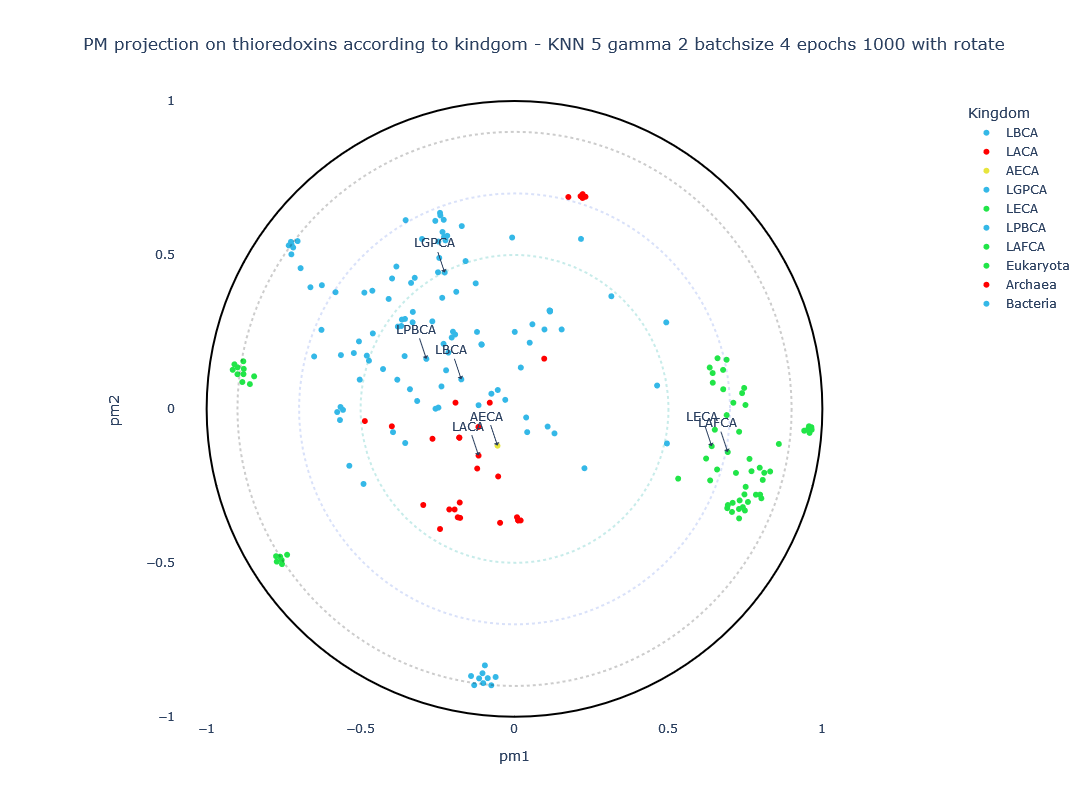

In [138]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to kindgom - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 3 epochs 1000)

In [107]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize3_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1            0.166496 -0.036440           0         LBCA      LBCA   
2            0.036426  0.166053           1         LACA      LACA   
3           -0.012948  0.112653           2         AECA      AECA   
4            0.320354 -0.363651           3        LGPCA     LGPCA   
5           -0.599731 -0.198492           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206          0.836658  0.188183         205  Escherichia  Bacteria   
207          0.838281  0.183093         206     Shigella  Bacteria   
208          0.826839  0.185471         207   Salmonella  Bacteria   
209          0.842968  0.189186         208     Yersinia  Bacteria   
210          0.837450  0.161816         209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                       

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


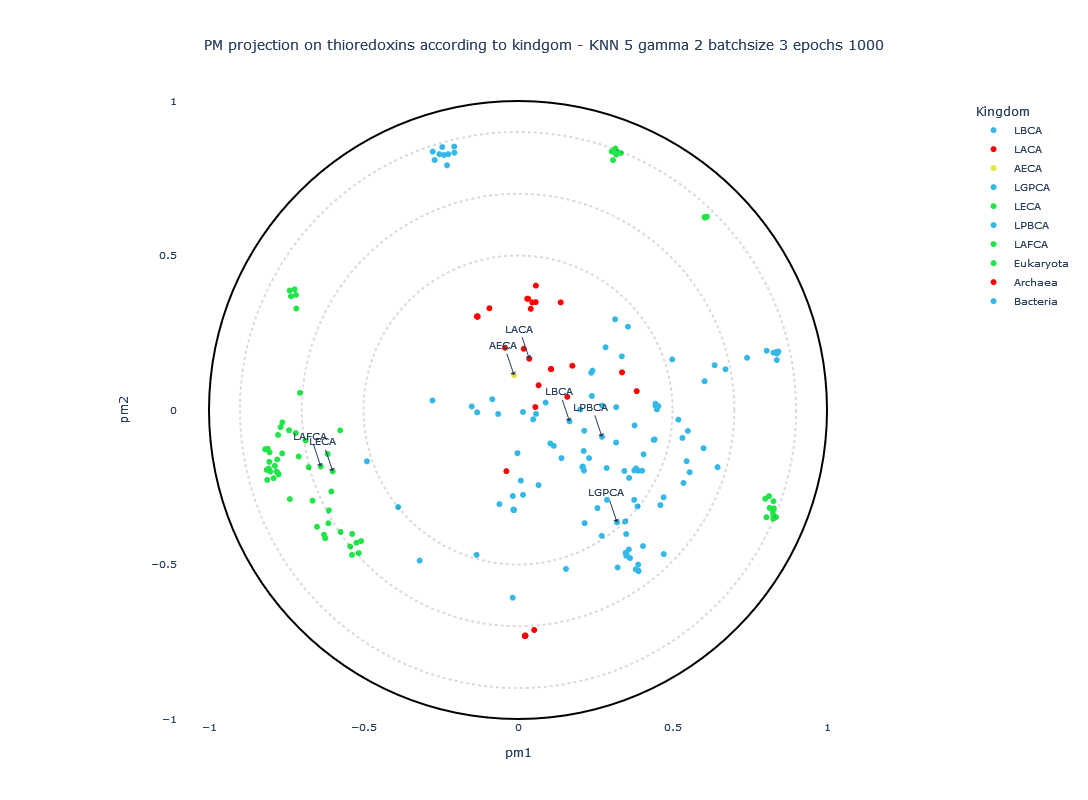

In [108]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to kindgom - KNN 5 gamma 2 batchsize 3 epochs 1000", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 3 epochs 1000 rotate)

In [111]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize3_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

result:                    pm1       pm2 Unnamed: 0      Species   Kingdom  \
proteins_id                                                         
0            0.000000  0.000000       root         root      root   
1           -0.096589 -0.187711          0         LBCA      LBCA   
2            0.105768 -0.284954          1         LACA      LACA   
3            0.067140 -0.236124          2         AECA      AECA   
4           -0.347555 -0.472171          3        LGPCA     LGPCA   
...               ...       ...        ...          ...       ...   
206         -0.708221 -0.114119        205  Escherichia  Bacteria   
207         -0.708632 -0.114083        206     Shigella  Bacteria   
208         -0.702873 -0.116532        207   Salmonella  Bacteria   
209         -0.710147 -0.113486        208     Yersinia  Bacteria   
210         -0.710721 -0.113325        209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                                  
0

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


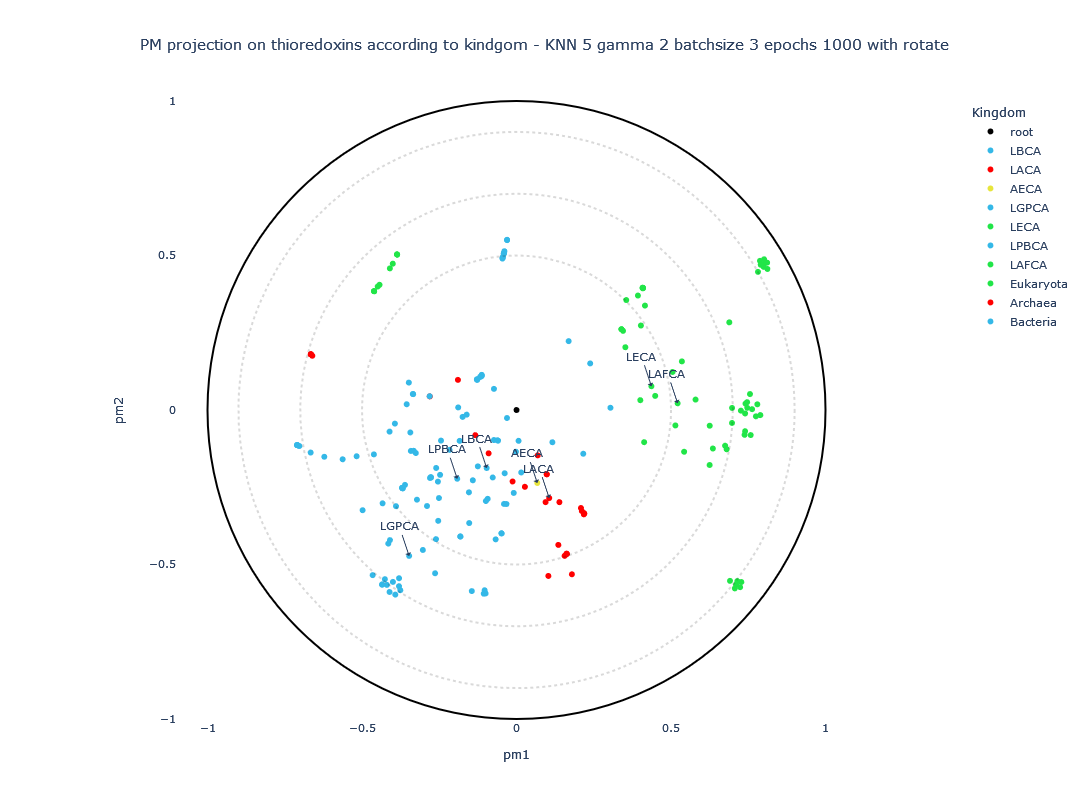

In [112]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to kindgom - KNN 5 gamma 2 batchsize 3 epochs 1000 with rotate", 
                                    fontsize = 11
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 6 epochs1000)

In [114]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize6_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1           -0.058822  0.234382           0         LBCA      LBCA   
2           -0.241481  0.087671           1         LACA      LACA   
3           -0.182664  0.049156           2         AECA      AECA   
4           -0.014793  0.572183           3        LGPCA     LGPCA   
5           -0.043844 -0.599830           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206          0.782259  0.211297         205  Escherichia  Bacteria   
207          0.777038  0.223527         206     Shigella  Bacteria   
208          0.763583  0.213427         207   Salmonella  Bacteria   
209          0.789448  0.223954         208     Yersinia  Bacteria   
210          0.763295  0.252121         209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                       

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


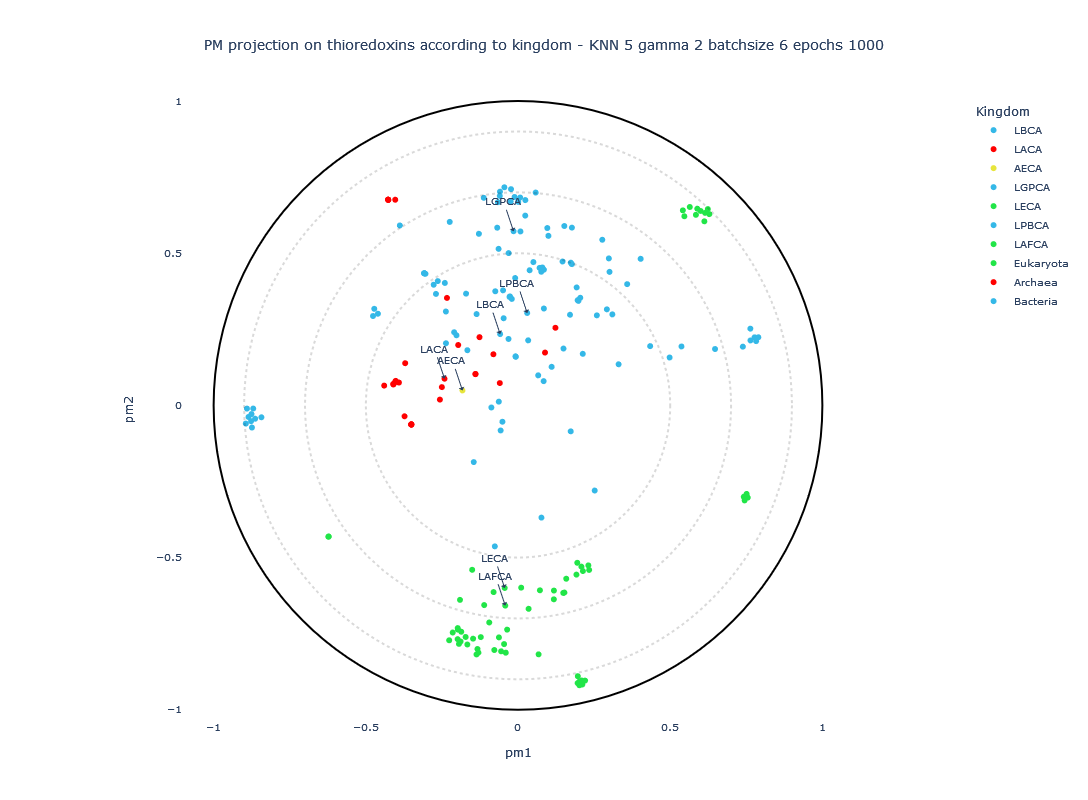

In [115]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to kingdom - KNN 5 gamma 2 batchsize 6 epochs 1000", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 6 epochs 1000 rotate)

In [118]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize6_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

result:                    pm1       pm2 Unnamed: 0      Species   Kingdom  \
proteins_id                                                         
0            0.000000  0.000000       root         root      root   
1           -0.151399  0.063167          0         LBCA      LBCA   
2           -0.000621  0.183087          1         LACA      LACA   
3            0.010480  0.105070          2         AECA      AECA   
4           -0.398772 -0.263308          3        LGPCA     LGPCA   
...               ...       ...        ...          ...       ...   
206         -0.648435  0.313878        205  Escherichia  Bacteria   
207         -0.648929  0.314082        206     Shigella  Bacteria   
208         -0.647919  0.308864        207   Salmonella  Bacteria   
209         -0.648984  0.315013        208     Yersinia  Bacteria   
210         -0.648927  0.315136        209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                                  
0

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


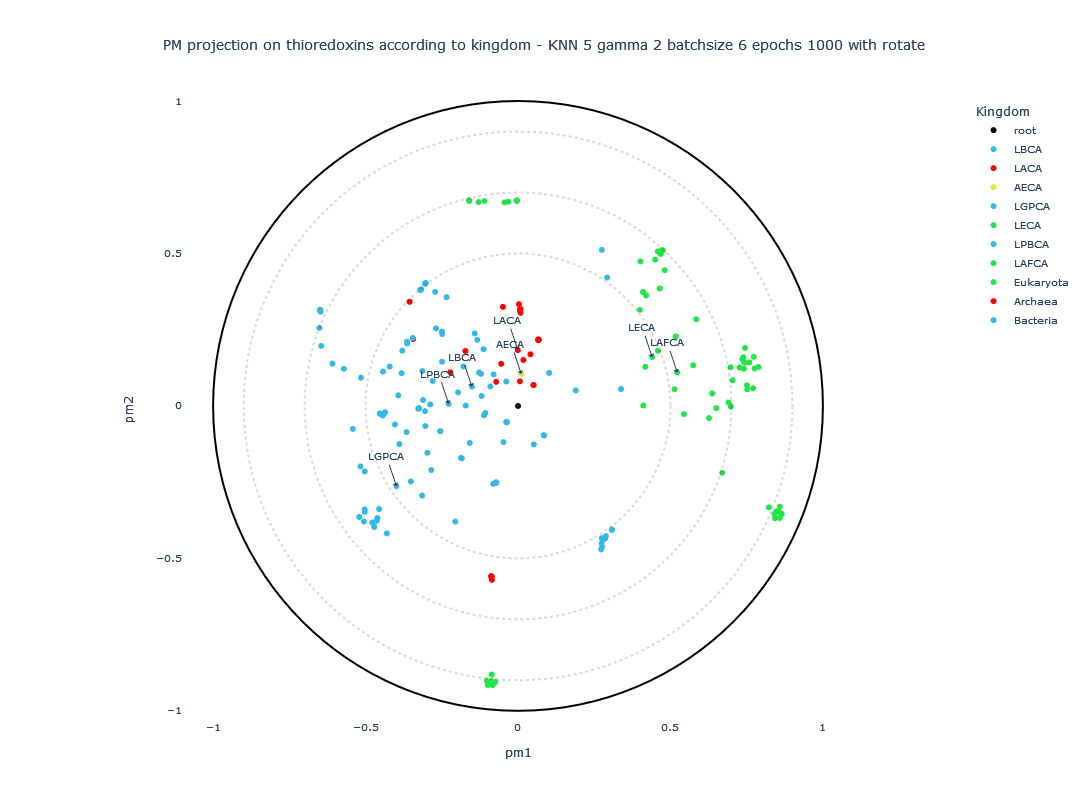

In [119]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Kingdom',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title = "PM projection on thioredoxins according to kingdom - KNN 5 gamma 2 batchsize 6 epochs 1000 with rotate", 
                                    fontsize = 10
                              )
trace1.show()

# Thioredoxins0.9 - by Species

## KNN 5 gamma 2 (batchsize 4 epochs 1000)

In [216]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1           -0.172963  0.095931           0         LBCA      LBCA   
2           -0.116782 -0.151616           1         LACA      LACA   
3           -0.055288 -0.119555           2         AECA      AECA   
4           -0.226944  0.442964           3        LGPCA     LGPCA   
5            0.640479 -0.121158           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206         -0.724132  0.533609         205  Escherichia  Bacteria   
207         -0.733357  0.530998         206     Shigella  Bacteria   
208         -0.718933  0.524274         207   Salmonella  Bacteria   
209         -0.726264  0.542592         208     Yersinia  Bacteria   
210         -0.704755  0.545130         209       Vibrio  Bacteria   

                     Family  Color_eukaryota Eukaryota_detail  
proteins_id     

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota',
       'Eukaryota_detail'],
      dtype='object')


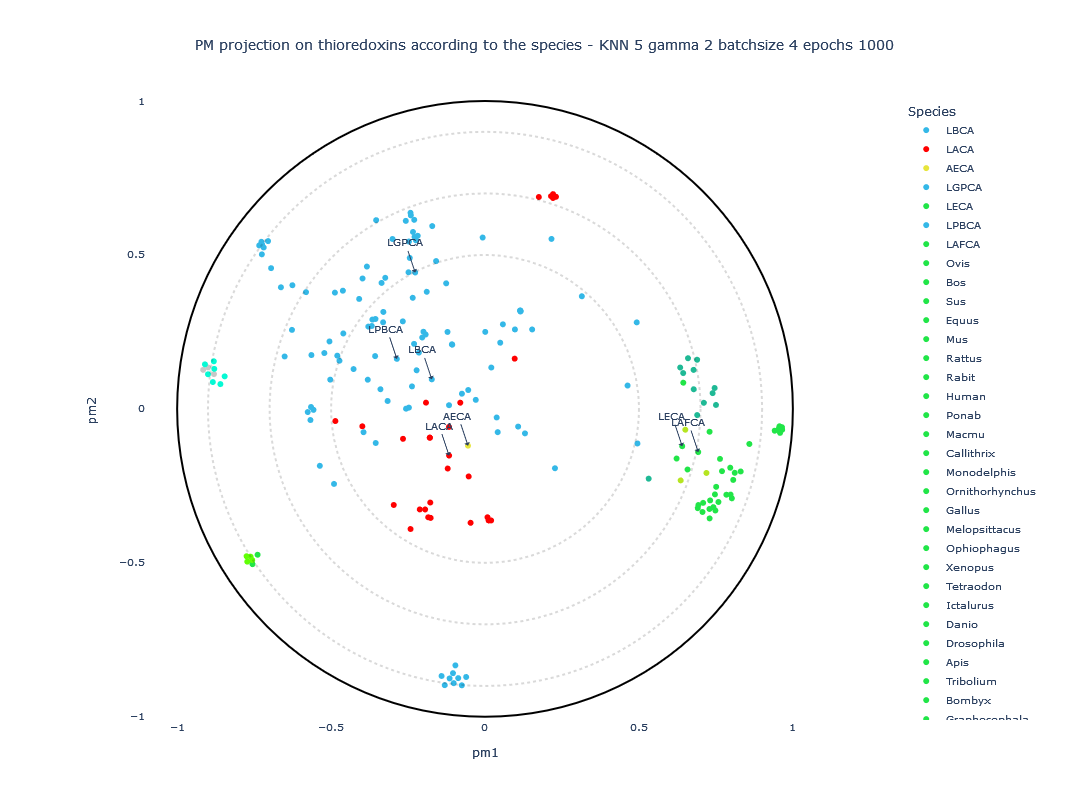

In [222]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Species',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'], 
                                    title = "PM projection on thioredoxins according to the species - KNN 5 gamma 2 batchsize 4 epochs 1000", 
                                    fontsize = 10
                              )
trace1.show()

## KNN 5 gamma 2 (batchsize 4 epochs 1000 rotate)

In [120]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize4_epochs1000/PM5sigma=1.00gamma=2.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

result:                    pm1       pm2 Unnamed: 0      Species   Kingdom  \
proteins_id                                                         
0            0.000000  0.000000       root         root      root   
1           -0.014095 -0.177599          0         LBCA      LBCA   
2            0.162667  0.007940          1         LACA      LACA   
3            0.099358  0.042898          2         AECA      AECA   
4           -0.310070 -0.380119          3        LGPCA     LGPCA   
...               ...       ...        ...          ...       ...   
206         -0.209639 -0.878274        205  Escherichia  Bacteria   
207         -0.215461 -0.869909        206     Shigella  Bacteria   
208         -0.208035 -0.861562        207   Salmonella  Bacteria   
209         -0.223670 -0.875339        208     Yersinia  Bacteria   
210         -0.233787 -0.855481        209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                                  
0

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


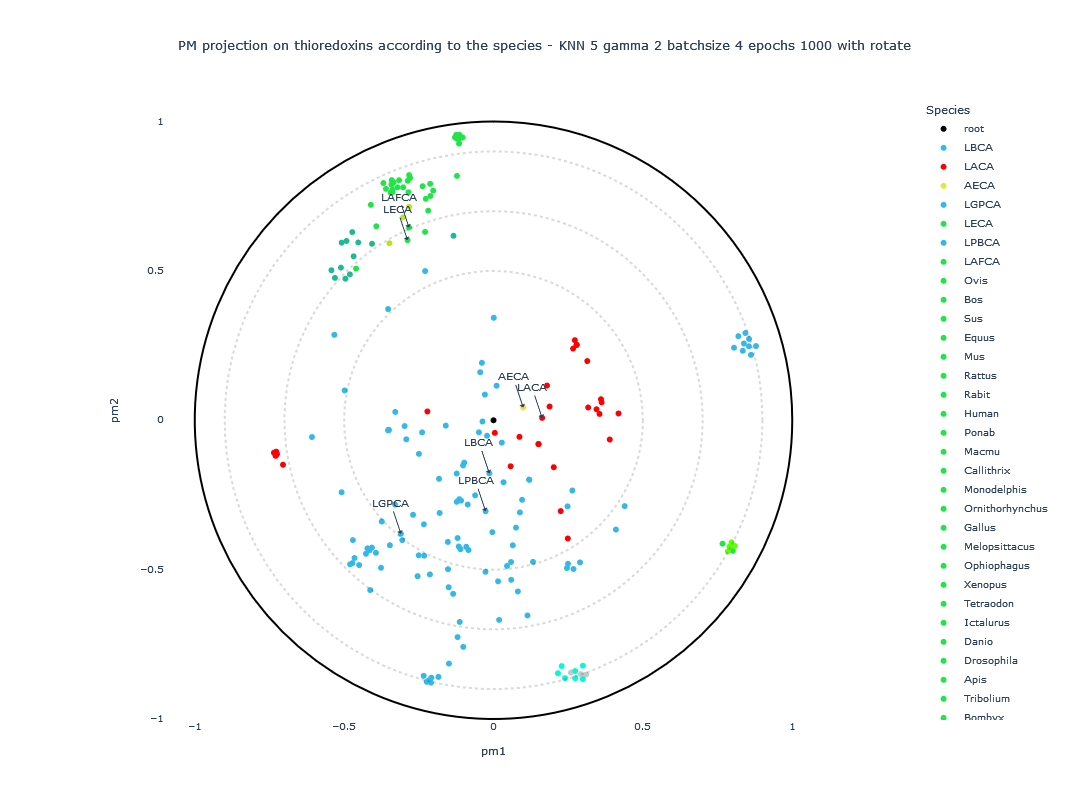

In [121]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Species',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],       
                                    title="PM projection on thioredoxins according to the species - KNN 5 gamma 2 batchsize 4 epochs 1000 with rotate"
                                   )
trace1.show()

## KNN 5 gamma 3 (batchsize 6 epochs 1000)

In [122]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9/batchsize6_epochs1000/PM5sigma=1.00gamma=3.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=False) 

result:                    pm1       pm2  Unnamed: 0      Species   Kingdom  \
proteins_id                                                          
1            0.128480  0.105362           0         LBCA      LBCA   
2           -0.003487  0.049007           1         LACA      LACA   
3            0.008707  0.066587           2         AECA      AECA   
4            0.356568  0.046757           3        LGPCA     LGPCA   
5           -0.482924 -0.232537           4         LECA      LECA   
...               ...       ...         ...          ...       ...   
206          0.723498  0.250101         205  Escherichia  Bacteria   
207          0.727567  0.260398         206     Shigella  Bacteria   
208          0.710893  0.255250         207   Salmonella  Bacteria   
209          0.733904  0.247432         208     Yersinia  Bacteria   
210          0.720959  0.221864         209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                       

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


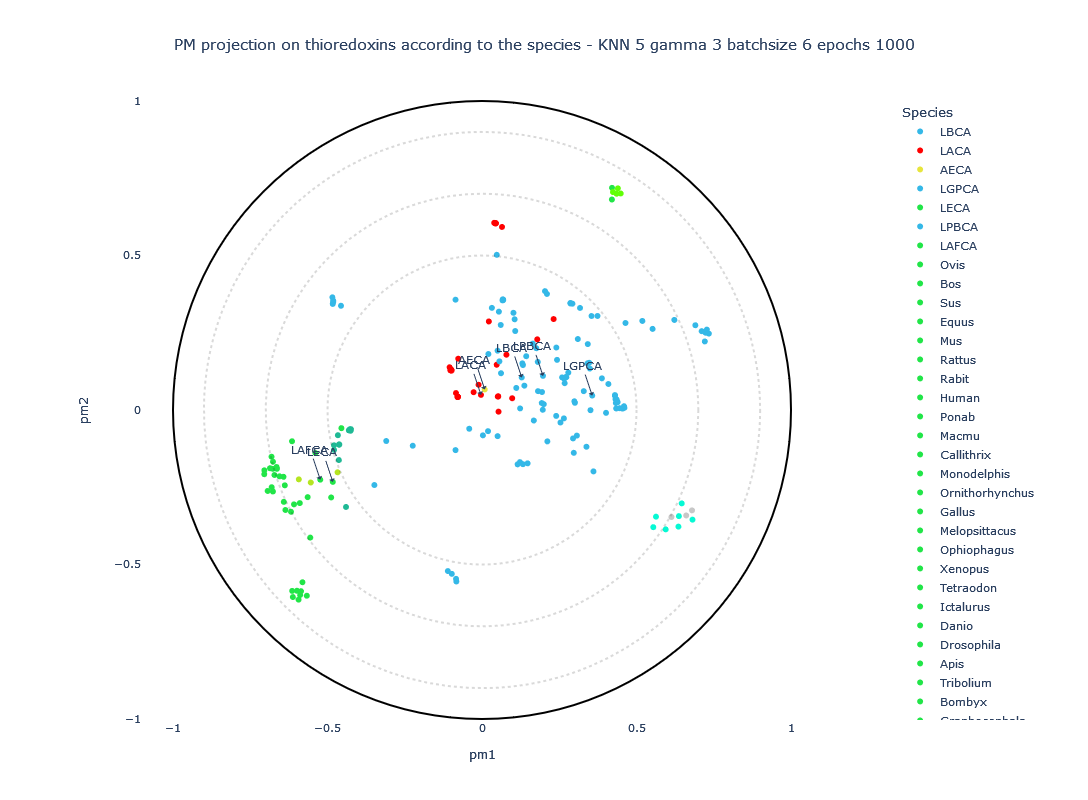

In [124]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Species',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'],
                                    title="PM projection on thioredoxins according to the species - KNN 5 gamma 3 batchsize 6 epochs 1000", 
                                    fontsize = 11
                              )
trace1.show()

## KNN 5 gamma 3 (batchsize 6 epochs 1000 rotate) 

In [134]:
path_embedding = os.getcwd() + "/data/thioredoxins_out0.9_rot/batchsize6_epochs1000/PM5sigma=1.00gamma=3.00cosinepca=0_seed0.csv"
path_annotation = os.getcwd()+ "/data/annotation_new.csv"
df5 = read_embeddings(path_embedding, path_annotation, withroot=True) 

result:                    pm1       pm2 Unnamed: 0      Species   Kingdom  \
proteins_id                                                         
0            0.000000  0.000000       root         root      root   
1           -0.067813 -0.061144          0         LBCA      LBCA   
2            0.034864 -0.149538          1         LACA      LACA   
3            0.020303 -0.124982          2         AECA      AECA   
4           -0.346118 -0.147586          3        LGPCA     LGPCA   
...               ...       ...        ...          ...       ...   
206         -0.280796  0.359934        205  Escherichia  Bacteria   
207         -0.280975  0.360376        206     Shigella  Bacteria   
208         -0.279726  0.356933        207   Salmonella  Bacteria   
209         -0.281157  0.360810        208     Yersinia  Bacteria   
210         -0.281794  0.362500        209       Vibrio  Bacteria   

                     Family Color_eukaryota  
proteins_id                                  
0

Index(['Unnamed: 0', 'Species', 'Kingdom', 'Family', 'Color_eukaryota'], dtype='object')


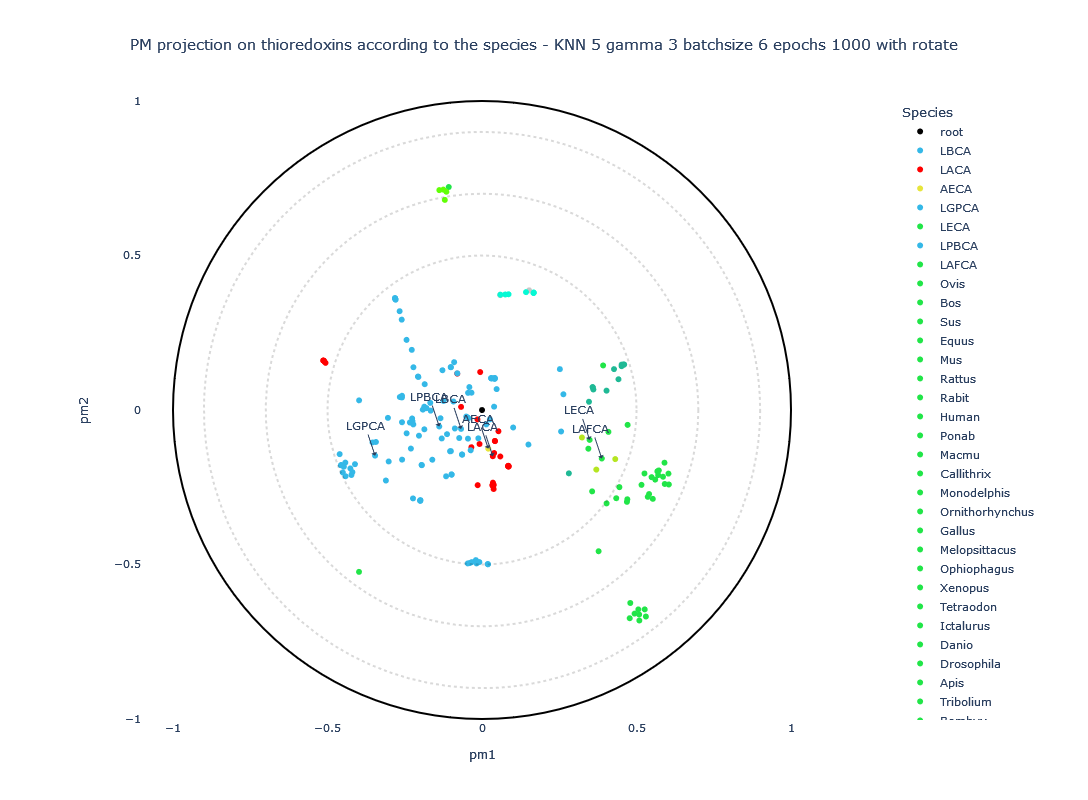

In [135]:
trace1 = plot_embedding_interactive(df5, 
                                    labels_name = 'Species',
                                    show_text=True,
                                    color_palette = trx_palette,
                                    labels_text= ['LBCA', 'LACA', 'AECA', 'LGPCA', 'LECA', 'LPBCA', 'LAFCA'], 
                                    title="PM projection on thioredoxins according to the species - KNN 5 gamma 3 batchsize 6 epochs 1000 with rotate", 
                                    fontsize = 11
                              )
trace1.show()